In [1]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import axes3d
from numpy.linalg import norm
from scipy.integrate import solve_ivp 

### Initial value problem
https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html

In [2]:
def dSdt_three_bodies3D (t, S, G, m1, m2, m3):
    r1 = S[0:3]
    r2 = S[3:6]
    r3 = S[6:9]
    
    v1 = S[9:12]
    v2 = S[12:15]
    v3 = S[15:18]
    
    r12__3 = np.power(norm(r1-r2),3)
    r23__3 = np.power(norm(r2-r3),3)
    r13__3 = np.power(norm(r1-r3),3)
    
    a1 = G*((m2*(r2-r1)/r12__3) + (m3*(r3-r1)/r13__3))
    a2 = G*((m1*(r1-r2)/r12__3) + (m3*(r3-r2)/r23__3))
    a3 = G*((m1*(r1-r3)/r13__3) + (m2*(r2-r3)/r23__3))
    
    return np.concatenate((v1,v2,v3,a1,a2,a3))

In [3]:
# Original Lemiscate problem 
# Initial conditions
r1 = np.array([0.97000436, -0.24308753, 0])
v1 = np.array([0.4662036850, 0.4323657300, 0])
#v1 = np.array([0.5662036850, 0.4323657300, 0])

r2 = np.array([0,0,0])
v2 = np.array([-0.93240737,-0.86473146,0])

r3 = np.array([-0.97000436, 0.24308753, 0])
v3 = np.array([0.4662036850, 0.4323657300, 0])


S0 = np.concatenate((r1, r2, r3, v1, v2, v3))

# Masses and G
G=1
m1=1
m2=1
m3=1

# Time
tf = 30         #simulation for tf seconds
n_steps = 1000  #number of evaluation points
dt = tf/n_steps
T = np.linspace(0.0, tf, n_steps+1)

# Solve the IVP
sol = solve_ivp(dSdt_three_bodies3D, (0, tf), S0, args=(G,m1,m2,m3), t_eval=T, method='RK45', rtol = 1e-13) 

orbs={}
orbs['m1'] = sol.y[:3,:].T
orbs['m2'] = sol.y[3:6,:].T
orbs['m3'] = sol.y[6:9,:].T
orbs['G'] =  (m1*orbs['m1']+m2*orbs['m2']+m3*orbs['m3'])/(m1+m2+m3)

# With respect G
#orbs['m1'] =  orbs['m1']  - orbs['G']
#orbs['m2'] =  orbs['m2']  - orbs['G'] 
#orbs['m3'] =  orbs['m3']  - orbs['G'] 
#orbs['G']  =  orbs['G']  - orbs['G']

In [4]:
# Sun Earth Moon
r1 = np.array([0, 0, 0])
v1 = np.array([0, 0, 0])

r2 = np.array([149.6*10**9,0,0])
v2 = np.array([0,30000,0])

r3 = np.array([1.49984*10**11, 0, 0])
v3 = np.array([0, 33000, 0])

S0 = np.concatenate((r1, r2, r3, v1, v2, v3))

# Masses and G
G= 6.67e-11
m1 = 1.989*10**30 #sun
m2 = 5.972*10**24 #earth
m3 = 7.348*10**22 #moon

# Time
tf = 60000000 # simulation for tf seconds
#n_steps = 1000  #number of evaluation points
dt = tf/n_steps
T = np.linspace(0.0, tf, n_steps+1)

# Solve the IVP
sol = solve_ivp(dSdt_three_bodies3D, (0, tf), S0, args=(G,m1,m2,m3), t_eval=T,method='LSODA', rtol = 1e-10) 

orbs={}
orbs['m1'] = sol.y[:3,:].T
orbs['m2'] = sol.y[3:6,:].T
orbs['m3'] = sol.y[6:9,:].T
orbs['G'] =  (m1*orbs['m1']+m2*orbs['m2']+m3*orbs['m3'])/(m1+m2+m3)

In [25]:
#Burrau’s Problem Constants
#state0 = [1.0, 0.0, 3.0, 0.0, 0.0, 0.0,    -2.0, 0.0, -1.0, 0.0, 0.0, 0.0,   1.0, 0.0, -1.0,0.0, 0.0, 0.0]

r1 = np.array([1.0, 3.0, 0])
v1 = np.array([0, 0, 0])

r2 = np.array([-2.0,-1.0,0])
v2 = np.array([0,0,0])

r3 = np.array([1.0,-1.0, 0])
v3 = np.array([0, 0, 0])

S0 = np.concatenate((r1, r2, r3, v1, v2, v3))

# Masses and G
G = 1
m1 = 3
m2 = 4
m3 = 5

# Time
tf = 40 # simulation for tf seconds
n_steps = 1000  #number of evaluation points
dt = tf/n_steps
T = np.linspace(0.0, tf, n_steps+1)

# Solve the IVP
sol = solve_ivp(dSdt_three_bodies3D, (0, tf), S0, args=(G,m1,m2,m3), t_eval=T,method='Radau', rtol = 1e-12) 

orbs={}
orbs['m1'] = sol.y[:3,:].T
orbs['m2'] = sol.y[3:6,:].T
orbs['m3'] = sol.y[6:9,:].T
orbs['G'] =  (m1*orbs['m1']+m2*orbs['m2']+m3*orbs['m3'])/(m1+m2+m3)

Text(0.5, 0.92, 'Lemiscate problem')

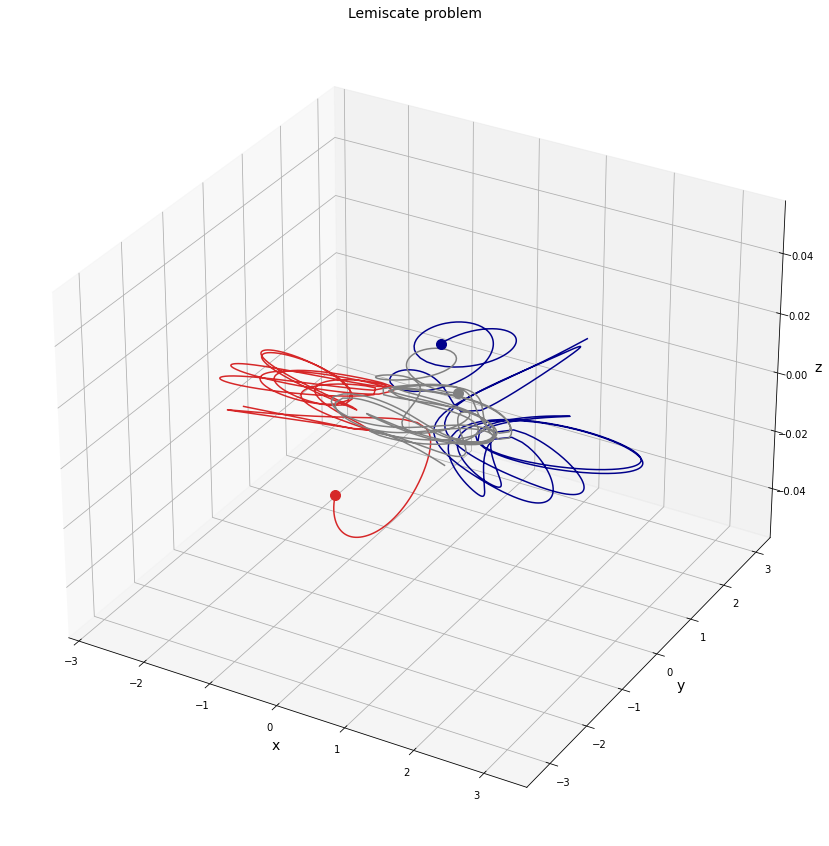

In [26]:
#https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
fig=plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
#ax=fig.add_subplot(111,projection="3d")
#Plot the orbits
ax.plot(orbs['m1'][:,0],orbs['m1'][:,1],orbs['m1'][:,2],color="darkblue")
ax.plot(orbs['m2'][:,0],orbs['m2'][:,1],orbs['m2'][:,2],color="tab:red")
ax.plot(orbs['m3'][:,0],orbs['m3'][:,1],orbs['m3'][:,2],color="gray")
#Plot the final positions of the stars
ax.scatter(orbs['m1'][-1,0],orbs['m1'][-1,1],orbs['m1'][-1,2],color="darkblue",marker="o",s=100,label="Alpha Centauri A")
ax.scatter(orbs['m2'][-1,0],orbs['m2'][-1,1],orbs['m2'][-1,2],color="tab:red",marker="o",s=100,label="Alpha Centauri B")
ax.scatter(orbs['m3'][-1,0],orbs['m3'][-1,1],orbs['m3'][-1,2],color="gray",marker="o",s=100,label="Alpha Centauri B")
#Add a few more bells and whistles
ax.set_xlabel("x",fontsize=14)
ax.set_ylabel("y",fontsize=14)
ax.set_zlabel("z",fontsize=14)
ax.set_title("Lemiscate problem",fontsize=14)
#ax.legend(loc="upper left",fontsize=14)